<a href="https://colab.research.google.com/github/TanmayWINTR/ML/blob/main/Copy_of_COMP5611M_Coursework_Assessment_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd

root_dir = '/content/gdrive/MyDrive/Machine Learning/Coursework/' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'


/content/gdrive/MyDrive/Machine Learning/Coursework/Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_data, training_targets, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



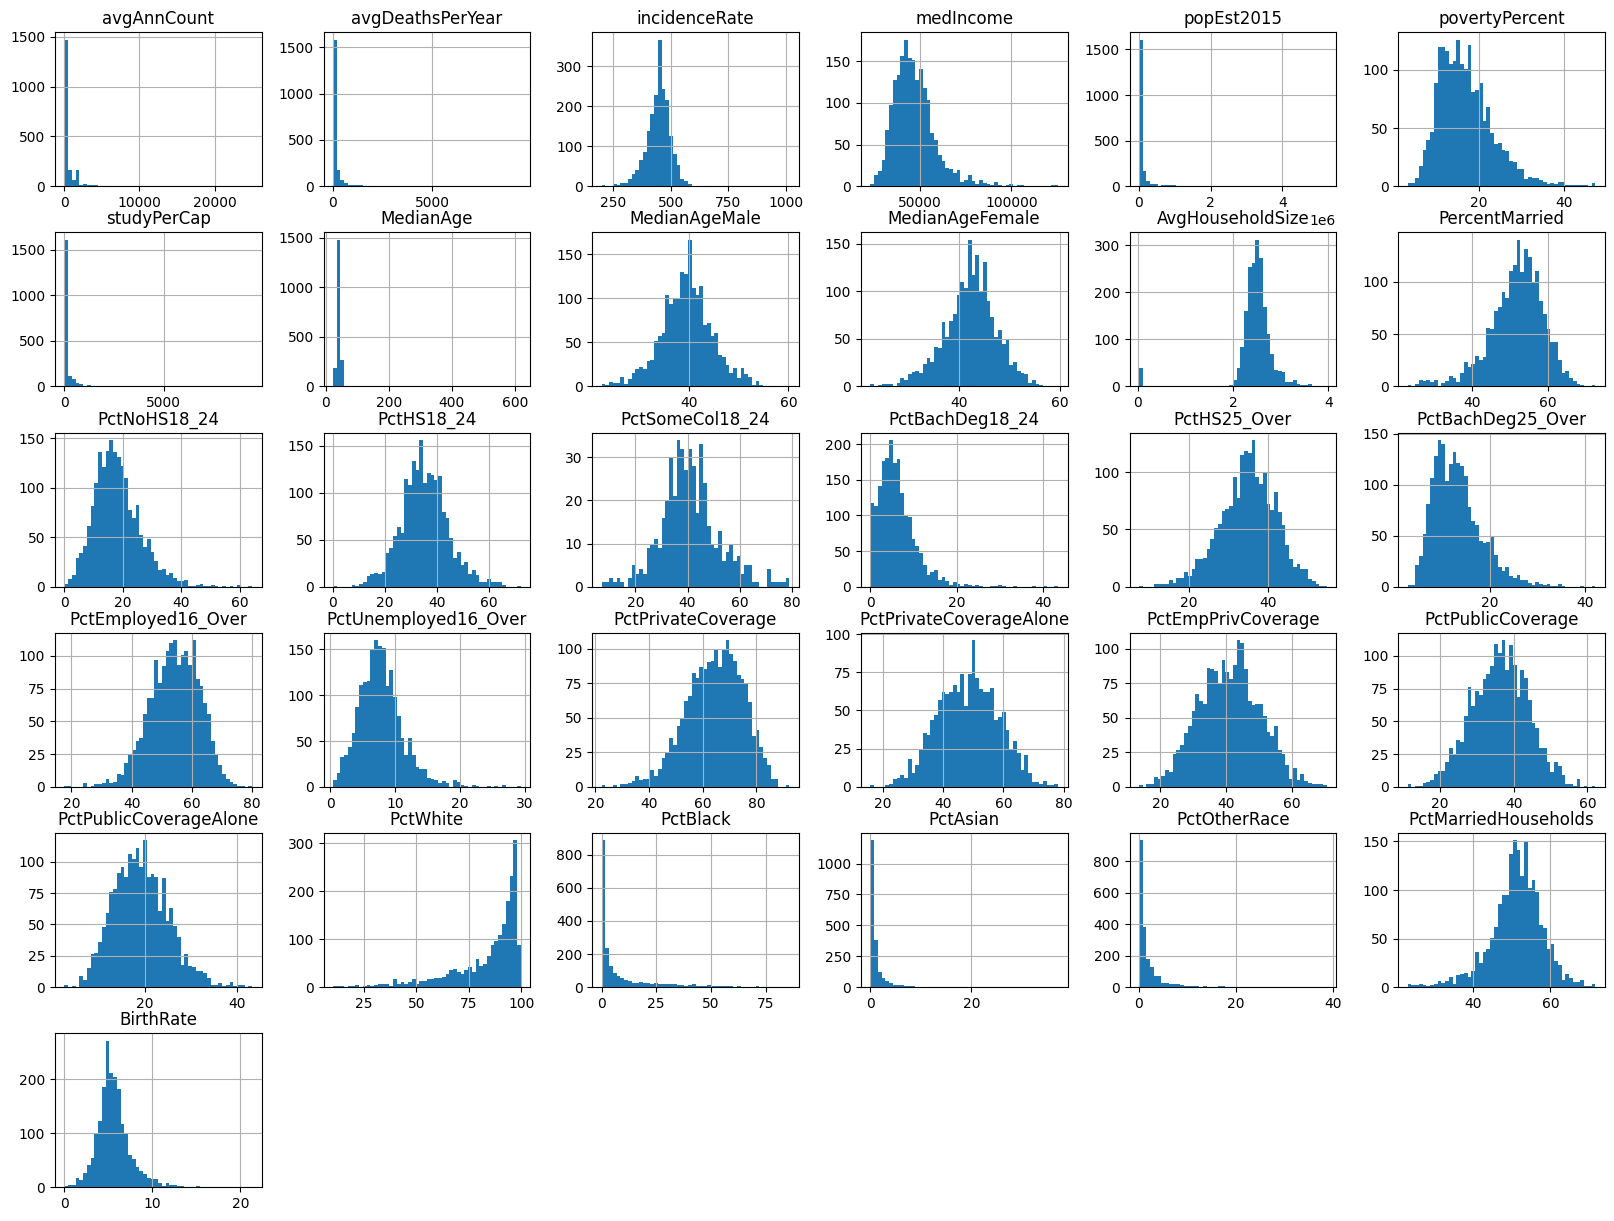

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of all columns in training data
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
print(X_train.describe())

        avgAnnCount  avgDeathsPerYear  incidenceRate      medIncome  \
count   1950.000000       1950.000000    1950.000000    1950.000000   
mean     581.003998        177.283590     447.647937   47005.598462   
std     1279.654997        452.779841      53.087664   11711.295345   
min        7.000000          3.000000     201.300000   22640.000000   
25%       74.000000         28.000000     420.825000   39047.250000   
50%      167.000000         60.000000     453.549422   45285.500000   
75%      488.500000        143.500000     480.200000   52492.500000   
max    24965.000000       9445.000000    1014.200000  125635.000000   

         popEst2015  povertyPercent  studyPerCap    MedianAge  MedianAgeMale  \
count  1.950000e+03     1950.000000  1950.000000  1950.000000    1950.000000   
mean   9.637037e+04       16.871949   155.174125    45.519128      39.576462   
std    2.843789e+05        6.394297   494.725155    46.829326       5.195883   
min    8.290000e+02        3.200000     

In [ ]:
# Identify outliers by looking at the histograms and the summary statistics
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 2032 to 860
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              1950 non-null   float64
 1   avgDeathsPerYear         1950 non-null   int64  
 2   incidenceRate            1950 non-null   float64
 3   medIncome                1950 non-null   int64  
 4   popEst2015               1950 non-null   int64  
 5   povertyPercent           1950 non-null   float64
 6   studyPerCap              1950 non-null   float64
 7   MedianAge                1950 non-null   float64
 8   MedianAgeMale            1950 non-null   float64
 9   MedianAgeFemale          1950 non-null   float64
 10  AvgHouseholdSize         1950 non-null   float64
 11  PercentMarried           1950 non-null   float64
 12  PctNoHS18_24             1950 non-null   float64
 13  PctHS18_24               1950 non-null   float64
 14  PctSomeCol18_24       

In [ ]:
print(X_train['PctPrivateCoverageAlone'].isnull().any())
print(X_train['PctSomeCol18_24'].isnull().any())


True
True


In [ ]:
print(X_train.columns)
print( y_train.columns)

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')
Index(['TARGET_deathRate'], dtype='object')


In [ ]:

## Calculate correlations with target variable
correlations = training_data.corrwith(y_train['TARGET_deathRate'])

## Sort correlations by strength
sorted_correlations = correlations.abs().sort_values(ascending=False)

print(sorted_correlations)


PctBachDeg25_Over          0.486265
PctPublicCoverageAlone     0.454016
medIncome                  0.425129
incidenceRate              0.422600
povertyPercent             0.418331
PctEmployed16_Over         0.410498
PctPublicCoverage          0.405689
PctHS25_Over               0.395560
PctPrivateCoverage         0.394802
PctUnemployed16_Over       0.364094
PctPrivateCoverageAlone    0.356911
PctMarriedHouseholds       0.297404
PctBachDeg18_24            0.281463
PercentMarried             0.271320
PctEmpPrivCoverage         0.269646
PctHS18_24                 0.242786
PctBlack                   0.230279
PctOtherRace               0.181092
PctWhite                   0.179046
PctAsian                   0.170023
PctSomeCol18_24            0.156621
avgAnnCount                0.131058
popEst2015                 0.109087
BirthRate                  0.093885
PctNoHS18_24               0.078733
avgDeathsPerYear           0.074118
AvgHouseholdSize           0.040110
MedianAgeMale              0

In [ ]:
## Sort correlations by strength
sorted_correlations = correlations.abs().sort_values(ascending=False)

## Get top five features with strongest correlations to target
top_five = sorted_correlations.head(5)

print(top_five)

PctBachDeg25_Over         0.486265
PctPublicCoverageAlone    0.454016
medIncome                 0.425129
incidenceRate             0.422600
povertyPercent            0.418331
dtype: float64


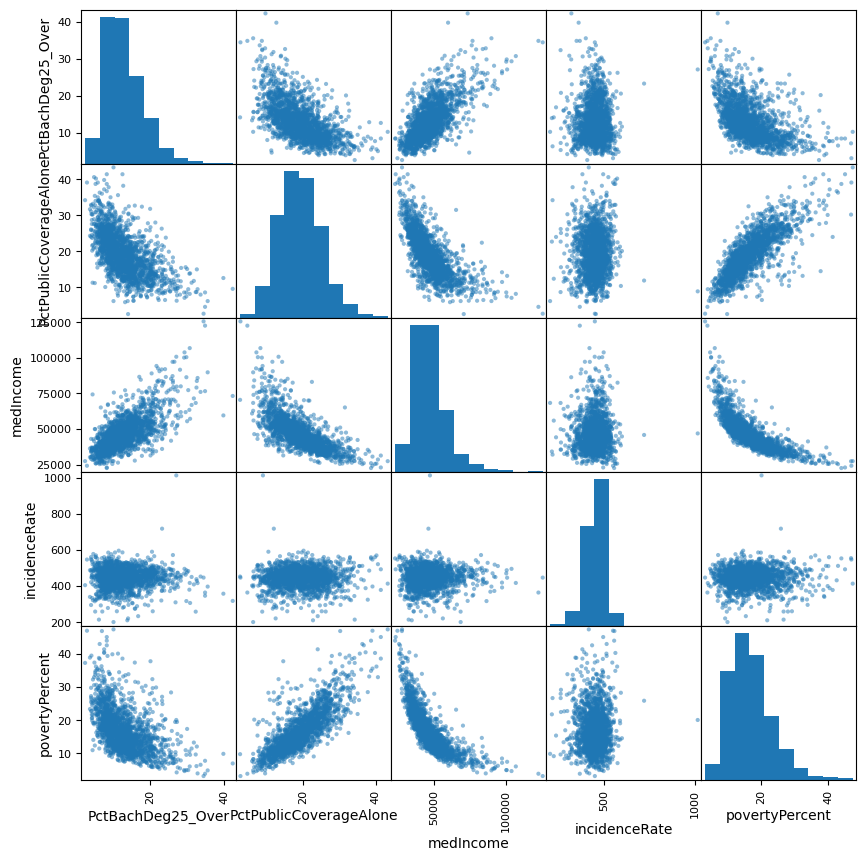

In [ ]:
## Scatter matrix plot
pd.plotting.scatter_matrix(X_train[top_five.index], figsize=(10,10), diagonal='hist')

plt.show()

<Axes: xlabel='PctBachDeg25_Over', ylabel='medIncome'>

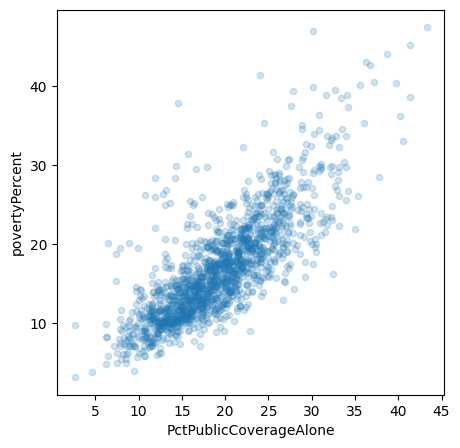

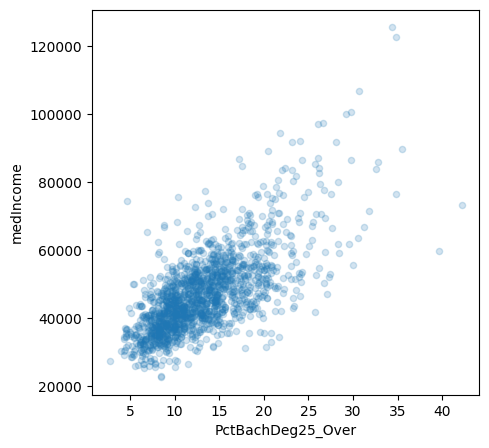

In [ ]:
X_train.plot(kind="scatter",x="PctPublicCoverageAlone",y="povertyPercent",alpha=0.2,figsize=(5,5))
X_train.plot(kind="scatter",x="PctBachDeg25_Over",y="medIncome",alpha=0.2,figsize=(5,5))

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

In [ ]:
# Check for missing data
missing_data = X_train.isnull().sum()

# Print columns with missing data and the number of missing values
for col, num_missing in missing_data.iteritems():
    if num_missing > 0:
        print(f"Column '{col}' has {num_missing} missing values.")
    

Column 'PctSomeCol18_24' has 1464 missing values.
Column 'PctEmployed16_Over' has 93 missing values.
Column 'PctPrivateCoverageAlone' has 395 missing values.


<ipython-input-44-fa9b836b70ec>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, num_missing in missing_data.iteritems():


In [ ]:
import numpy as np
data[np.isnan(data['PctPrivateCoverageAlone'])]

NameError: ignored

In [ ]:
from sklearn.impute import SimpleImputer
data1=data
imputer=SimpleImputer(strategy="median")

imputer.fit(data1)
print(imputer.statistics_)

[1.69000000e+02 6.10000000e+01 4.53549422e+02 4.52650000e+04
 2.57880000e+04 1.58000000e+01 0.00000000e+00 4.10000000e+01
 3.96000000e+01 4.24000000e+01 2.50000000e+00 5.25000000e+01
 1.72000000e+01 3.48000000e+01 4.03000000e+01 5.40000000e+00
 3.54000000e+01 1.24000000e+01 5.45000000e+01 7.60000000e+00
 6.51000000e+01 4.86000000e+01 4.11000000e+01 3.64000000e+01
 1.88000000e+01 9.01570756e+01 2.23113090e+00 5.43718536e-01
 8.43838450e-01 5.17045543e+01 5.35555507e+00]


In [ ]:
X=imputer.transform(data1)
data2 = pd.DataFrame(X,columns=data1.columns)
data2.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30.0,404.3,33975.0,8251.0,20.5,0.0,51.3,50.8,51.9,...,48.6,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41.0,403.8,47363.0,22702.0,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11.0,352.0,77222.0,9899.0,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100.0,429.6,80650.0,48904.0,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32.0,407.5,42839.0,22255.0,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [ ]:
# Check for missing data
missing_data = data2.isnull().sum()

# Print columns with missing data and the number of missing values
for col, num_missing in missing_data.iteritems():
    if num_missing > 0:
        print(f"Column '{col}' has {num_missing} missing values.")
             

NameError: ignored

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocess the training data using the pipeline
X_train_processed = pipeline.fit_transform(X_train)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X_train.columns)
X_train_processed_df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.128977,-0.053646,-0.029166,0.799382,-0.041545,-0.981118,0.164471,-0.137110,-0.187978,-0.445440,...,1.492915,1.557573,-0.784939,-0.829350,0.662262,-0.567052,-0.213109,0.003537,0.529158,-0.458523
1,-0.394742,-0.318743,-0.249612,-0.911029,-0.296052,0.598820,-0.313738,-0.019632,0.447303,0.713338,...,-0.590766,-0.525352,0.385399,0.584977,-0.990731,1.517064,-0.417955,-0.506876,-0.761643,-1.375816
2,-0.142265,-0.073528,0.447527,-0.236550,-0.049226,-0.371043,0.618949,-0.235364,-1.169776,-1.281280,...,0.085022,-0.119448,-0.679740,-0.458931,0.566108,-0.588897,0.129873,0.054313,0.627064,1.457320
3,-0.436952,-0.365135,-1.178503,-0.860638,-0.320677,0.880393,-0.313738,-0.188373,-1.554795,0.371403,...,-1.491818,-1.112843,0.214451,0.231395,0.672040,-0.537742,-0.473139,0.327809,0.636916,5.825411
4,-0.317358,-0.203868,-0.153520,-0.741064,-0.233932,0.332890,-0.313738,-0.075167,0.216292,0.219432,...,0.028707,-0.632168,0.714146,0.366093,0.824078,-0.521763,-0.459222,-0.539978,-0.160197,0.806795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,5.278554,4.810892,-0.520931,4.288704,6.407440,-1.309619,0.515852,-0.186237,-0.707753,-0.825367,...,0.028707,1.728480,-1.508182,-0.846187,-2.114237,-0.447565,12.271316,2.359169,0.765268,-0.052393
1946,-0.442423,-0.376181,-2.203486,-0.526857,-0.324613,1.506111,-0.313738,-0.100799,-0.053221,0.922297,...,-0.827292,-0.397172,1.003443,0.854372,0.603801,-0.588457,-0.177502,0.754645,1.491927,2.964464
1947,0.286866,0.505268,0.522893,-0.421206,0.435864,1.271467,-0.065928,-0.269540,-1.420038,-1.604218,...,0.028707,-0.226265,-0.429893,0.231395,-2.371251,2.682605,0.362787,-0.246551,-4.113361,-0.379819
1948,1.079993,1.366835,0.111193,2.485281,1.701648,-1.606835,0.595842,-0.186237,-0.765506,-0.768378,...,0.028707,2.337335,-2.284024,-1.890095,0.205609,-0.318181,1.210546,-0.312052,0.638588,-0.058608


In [ ]:
# Check for missing data
missing_data = X_train_processed_df.isnull().sum()

# Print columns with missing data and the number of missing values
for col, num_missing in missing_data.iteritems():
    if num_missing > 0:
        print(f"Column '{col}' has {num_missing} missing values.")

<ipython-input-46-39596eadc298>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, num_missing in missing_data.iteritems():


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

pipleline for test data:


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
ols = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [ ]:

from sklearn.model_selection import GridSearchCV

# Create OLS model
ols = LinearRegression()

# Define the parameter grid to search over
param_grid = {'fit_intercept': [True, False]}

# Create a GridSearchCV object with the OLS model and parameter grid
ols_cv = GridSearchCV(ols, param_grid, cv=5)

# Fit the grid search object to the data
ols_cv.fit(X_train_processed_df, y_train)

# Print the best hyperparameters and corresponding mean cross-validation score
print("Best hyperparameters:", ols_cv.best_params_)
print("Best cross-validation score:", ols_cv.best_score_)

Best hyperparameters: {'fit_intercept': True}
Best cross-validation score: 0.47047648723720775


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an instance of the Lasso model
lasso = Lasso()

# Create a GridSearchCV object with the Lasso model and parameter grid
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

# Fit the grid search object to the data
lasso_cv.fit(X_train_processed_df,  y_train)

# Print the best alpha value and corresponding mean cross-validation score
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Best cross-validation score:", lasso_cv.best_score_)


Best alpha: 0.1
Best cross-validation score: 0.47289860258033334


In [ ]:
# Define the parameter grid to search over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an instance of the Ridge model
ridge = Ridge()

# Create a GridSearchCV object with the Ridge model and parameter grid
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit the grid search object to the data
ridge_cv.fit(X_train_processed_df,  y_train)

# Print the best alpha value and corresponding mean cross-validation score
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best cross-validation score:", ridge_cv.best_score_)


Best alpha: 10
Best cross-validation score: 0.47229926345167117


In [ ]:
# Fit the OLS model
ols.fit(X_train_processed_df,  y_train)

# Fit the Lasso model with the best alpha value
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso_best.fit(X_train_processed_df,  y_train)

# Fit the Ridge model with the best alpha value
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train_processed_df,  y_train)


Ridge(alpha=10)

Test:

In [ ]:
# Load the test data
testdata = X_test
test_targets = y_test

In [ ]:
# Check for missing data
missing_data = testdata.isnull().sum()

# Print columns with missing data and the number of missing values
for col, num_missing in missing_data.iteritems():
    if num_missing > 0:
        print(f"Column '{col}' has {num_missing} missing values.")

Column 'PctSomeCol18_24' has 365 missing values.
Column 'PctEmployed16_Over' has 26 missing values.
Column 'PctPrivateCoverageAlone' has 88 missing values.


<ipython-input-53-361c6602520d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, num_missing in missing_data.iteritems():


In [ ]:
# Preprocess the training data using the pipeline
X_test_processed = pipeline.fit_transform(testdata)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=testdata.columns)

In [ ]:
# Get predictions for the test set using each model
ols_pred = ols_cv.predict(X_test_processed_df)
lasso_pred = lasso_best.predict(X_test_processed_df)
ridge_pred = ridge_best.predict(X_test_processed_df)

# Calculate mean squared error for each model
from sklearn.metrics import mean_squared_error

ols_mse = mean_squared_error(y_test, ols_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Calculate R-squared value for each model
from sklearn.metrics import r2_score

ols_r2 = r2_score(y_test, ols_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Print results
print("MSE values:")
print("OLS:", ols_mse)
print("Lasso:", lasso_mse)
print("Ridge:", ridge_mse)
print()
print("R-squared values:")
print("OLS:", ols_r2)
print("Lasso:", lasso_r2)
print("Ridge:", ridge_r2)


MSE values:
OLS: 360.140752381379
Lasso: 362.1477218717291
Ridge: 360.1588797396686

R-squared values:
OLS: 0.5623793510841153
Lasso: 0.5599406065518351
Ridge: 0.5623573238454722


In [ ]:
# Ordinary Least Squares
from sklearn.metrics import mean_squared_error, r2_score
ols_pred = ols.predict(X_test_processed_df)
ols_mse = mean_squared_error(test_targets, ols_pred)
ols_mse = mean_squared_error(test_targets, ols_pred)
ols_r2 = r2_score(test_targets, ols_pred)

In [ ]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso_pred = lasso_best.predict(X_test_processed_df)
lasso_mse = mean_squared_error(test_targets, lasso_pred)
lasso_r2 = r2_score(test_targets, lasso_pred)

In [ ]:
lin_rmse=np.sqrt(lasso_mse )
lin_rmse

22.545957513985254

In [ ]:
# Ridge
ridge = Ridge(alpha=10)
ridge_pred = ridge_best.predict(X_test_processed_df)
ridge_mse = mean_squared_error(test_targets, ridge_pred)
ridge_r2 = r2_score(test_targets, ridge_pred)

In [ ]:
print("MSE values:\nOLS: {}\nLasso: {}\nRidge: {}".format(ols_mse, lasso_mse, ridge_mse))
print("\nR-squared values:\nOLS: {}\nLasso: {}\nRidge: {}".format(ols_r2, lasso_r2, ridge_r2))

MSE values:
OLS: 360.140752381379
Lasso: 362.1477218717291
Ridge: 360.1588797396686

R-squared values:
OLS: 0.5623793510841153
Lasso: 0.5599406065518351
Ridge: 0.5623573238454722


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [ ]:
from sklearn.linear_model import Lasso

# Fit Lasso model with the best regularization weight
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_processed_df, y_train)

# Get coefficients and feature names
coefficients =  lasso_best.coef_
feature_names = X_train_processed_df.columns

# Create a dictionary of feature names and coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort feature_coefficients by absolute value of coefficients and get top 5
top_5_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

# Print the top 5 features in descending order of importance
print("Top 5 features according to Lasso regression:")
for feature, coefficient in top_5_features:
    print(f"{feature}: {coefficient}")


Top 5 features according to Lasso regression:
incidenceRate: 10.092283301446216
PctBachDeg25_Over: -7.22202699094431
PctPrivateCoverage: -6.0804923459596045
PctMarriedHouseholds: -5.302947868474297
PercentMarried: 4.469377915606204


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search over
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20]}

# Create an instance of the Random Forest regression model
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object with the Random Forest regression model and parameter grid
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the data
rf_cv.fit(X_train_processed_df, y_train)

# Print the best parameter values and corresponding mean cross-validation score
print("Best parameters:", rf_cv.best_params_)
print("Best cross-validation score:", rf_cv.best_score_)

# Predict on test data using the best model
y_pred_rf_cv = rf_cv.predict(X_test_processed_df)

# Evaluate the Random Forest regression model with GridSearchCV
rf_cv_mse = mean_squared_error(test_targets, y_pred_rf_cv)
rf_cv_r2 = r2_score(test_targets, y_pred_rf_cv)
print("Random Forest regression model with GridSearchCV:")
print("MSE:", rf_cv_mse)
print("R^2:", rf_cv_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score: 0.5111786552328331
Random Forest regression model with GridSearchCV:
MSE: 412.0199818831969
R^2: 0.4993389372189292


In [ ]:
# Print the best parameter values and corresponding mean cross-validation score
print("Best parameters:", rf_cv.best_params_)
print("Best cross-validation score:", rf_cv.best_score_)


Best parameters: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score: 0.5111786552328331


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest regression model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed_df, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_processed_df)

# Evaluate the Random Forest regression model
rf_mse = mean_squared_error(test_targets, y_pred_rf)
rf_r2 = r2_score(test_targets, y_pred_rf)
print("Random Forest regression model:")
print("MSE:", rf_mse)
print("R^2:", rf_r2)


<ipython-input-32-7c91ee891ce5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_processed_df, y_train)


Random Forest regression model:
MSE: 400.16451484221307
R^2: 0.5137449635999205


In [ ]:
if rf_cv_mse < ols_mse:
    print("Random Forest is the best model based on MSE")
else:
    print("OLS is the best model based on MSE")

if rf_cv_r2 > ols_r2:
    print("Random Forest is the best model based on R-squared")
else:
    print("OLS is the best model based on R-squared")

OLS is the best model based on MSE
OLS is the best model based on R-squared


In [ ]:
# Extract the feature importances from the trained Random Forest model
feature_importances = rf_cv.feature_importances_

# Get the top five most important/relevant features and their corresponding importances
indices = feature_importances.argsort()[::-1][:5]
top_features = X_train_processed_df.columns[indices]
top_importances = feature_importances[indices]

# Print the top five most important/relevant features and their corresponding importances
print("Top five most important/relevant features:")
for i in range(len(top_features)):
    print(str(i+1) + ".", top_features[i], "-", round(top_importances[i], 3))


AttributeError: ignored

The top 5 features identified by Random Forest and Lasso regression are somewhat different. While both models identified PctBachDeg25_Over as an important feature, Random Forest also identified incidenceRate, medIncome, PctHS25_Over, and avgDeathsPerYear as important features. In contrast, Lasso regression identified PctPrivateCoverage, PctMarriedHouseholds, and PercentMarried as important features.

In [ ]:


# Get the feature importances from the trained model
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train_processed_df.columns, columns=['importance'])

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top five most important features
print(feature_importances[:5])


<ipython-input-35-35be3194f4c8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_processed_df, y_train)


                   importance
incidenceRate        0.195168
PctBachDeg25_Over    0.177596
medIncome            0.054980
avgDeathsPerYear     0.043744
povertyPercent       0.043466


# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [ ]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

X_train_processed = pipeline.fit_transform(test_data)
test_data = pd.DataFrame(X_train_processed, columns=test_data.columns)

# Define the parameter grid to search over
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20]}

# Create an instance of the Random Forest regression model
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object with the Random Forest regression model and parameter grid
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the data
rf_cv.fit(X_train_processed_df, y_train)

# Print the best parameter values and corresponding mean cross-validation score
print("Best parameters:", rf_cv.best_params_)
print("Best cross-validation score:", rf_cv.best_score_)

# Predict on test data using the best model
y_pred_rf_cv = rf_cv.predict(test_data)

# Evaluate the Random Forest regression model with GridSearchCV
rf_cv_mse = mean_squared_error(test_targets, y_pred_rf_cv)
rf_cv_r2 = r2_score(test_targets, y_pred_rf_cv)
print("Random Forest regression model with GridSearchCV:")
print("MSE:", rf_cv_mse)
print("R^2:", rf_cv_r2)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score: 0.5111786552328331
Random Forest regression model with GridSearchCV:
MSE: 447.6344145083329
R^2: 0.40833416155262603


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [ ]:
root_dir = '/content/gdrive/MyDrive/Machine Learning/Coursework/' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


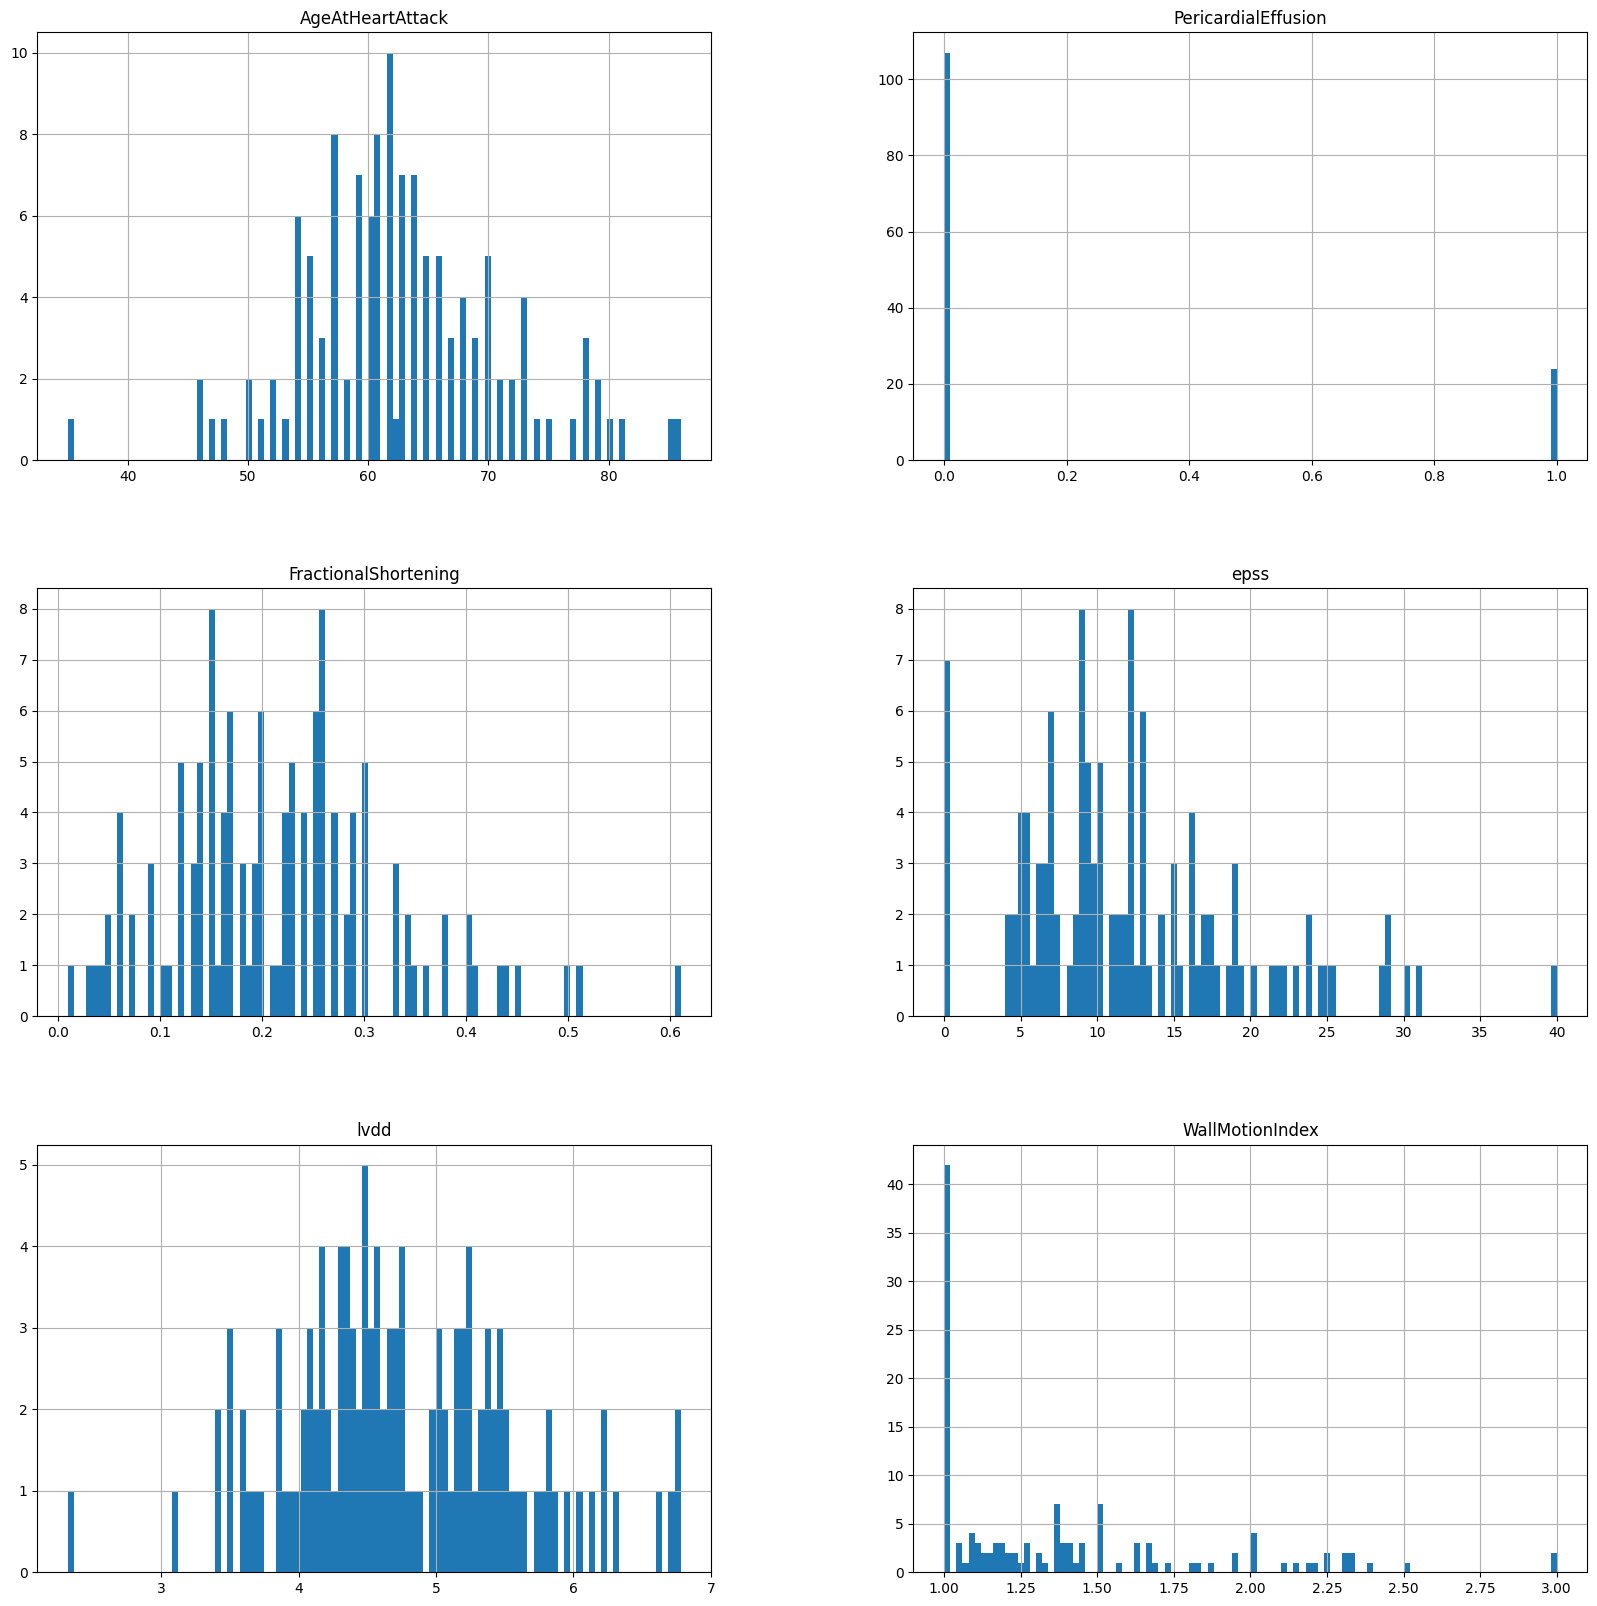

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the training data
features = pd.read_csv(data_features_path)
targets = pd.read_csv(data_targets_path)
features.hist(bins=100, figsize=(20, 20))
plt.show()

Potential outliers:
    AgeAtHeartAttack  PericardialEffusion  FractionalShortening  epss  lvdd  \
14              62.0                    0                  0.12  23.0  5.80   
32               NaN                    0                   NaN  12.0   NaN   
48              63.0                    1                   NaN   NaN   NaN   
53              60.0                    0                  0.01  24.6  5.65   
57              70.0                    0                  0.10   9.8  5.30   
65              50.0                    0                  0.14  11.4  4.75   
73              50.0                    0                  0.06  30.1  5.95   
83              61.0                    0                   NaN   NaN   NaN   

    WallMotionIndex  
14             2.33  
32             3.00  
48             2.30  
53             3.00  
57             2.30  
65             2.50  
73             2.39  
83             2.33  


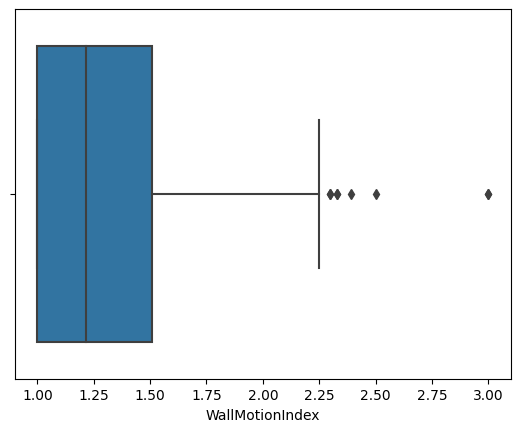

In [ ]:
import seaborn as sns

data=features

column_to_analyze = "WallMotionIndex"

# Create the box plot
sns.boxplot(x=data[column_to_analyze])

# Identify potential outliers
outliers = data[data[column_to_analyze] > data[column_to_analyze].quantile(0.75) + 1.5*(data[column_to_analyze].quantile(0.75) - data[column_to_analyze].quantile(0.25))]

# Print the potential outliers
print("Potential outliers:")
print(outliers)

Epss: it cannot be zero. zero should be removed. Values above 30 to be removed too.

In [ ]:
# Check for missing data
missing_data = features.isnull().sum()

# Print columns with missing data and the number of missing values
for col, num_missing in missing_data.iteritems():
    if num_missing > 0:
        print(f"Column '{col}' has {num_missing} missing values.")

Column 'AgeAtHeartAttack' has 5 missing values.
Column 'FractionalShortening' has 7 missing values.
Column 'epss' has 14 missing values.
Column 'lvdd' has 10 missing values.
Column 'WallMotionIndex' has 1 missing values.


<ipython-input-76-5b223e4dc260>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, num_missing in missing_data.iteritems():


# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocess the training data using the pipeline
X_train_processed = pipeline.fit_transform(features)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=features.columns)
X_train_processed_df


,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,1.008222,-0.473602,0.421192,-0.437785,-0.199163,-0.839848
1,1.130917,-0.473602,1.572694,-0.869769,-0.843625,0.720531
2,-0.954890,-0.473602,0.421192,-1.157758,-1.720093,-0.839848
3,-0.341418,-0.473602,0.354021,0.003126,-0.195296,0.163253
4,-0.709501,-0.473602,-0.538393,1.434144,1.283099,1.946542
...,...,...,...,...,...,...
126,0.149360,-0.473602,0.229275,0.123794,-0.044492,-0.839848
127,0.149360,-0.473602,0.613109,-0.956165,0.922200,-0.616937
128,0.762833,-0.473602,-0.154559,-0.725774,0.380852,-0.371734
129,-0.709501,-0.473602,-0.730310,0.584576,-0.508505,-0.037367


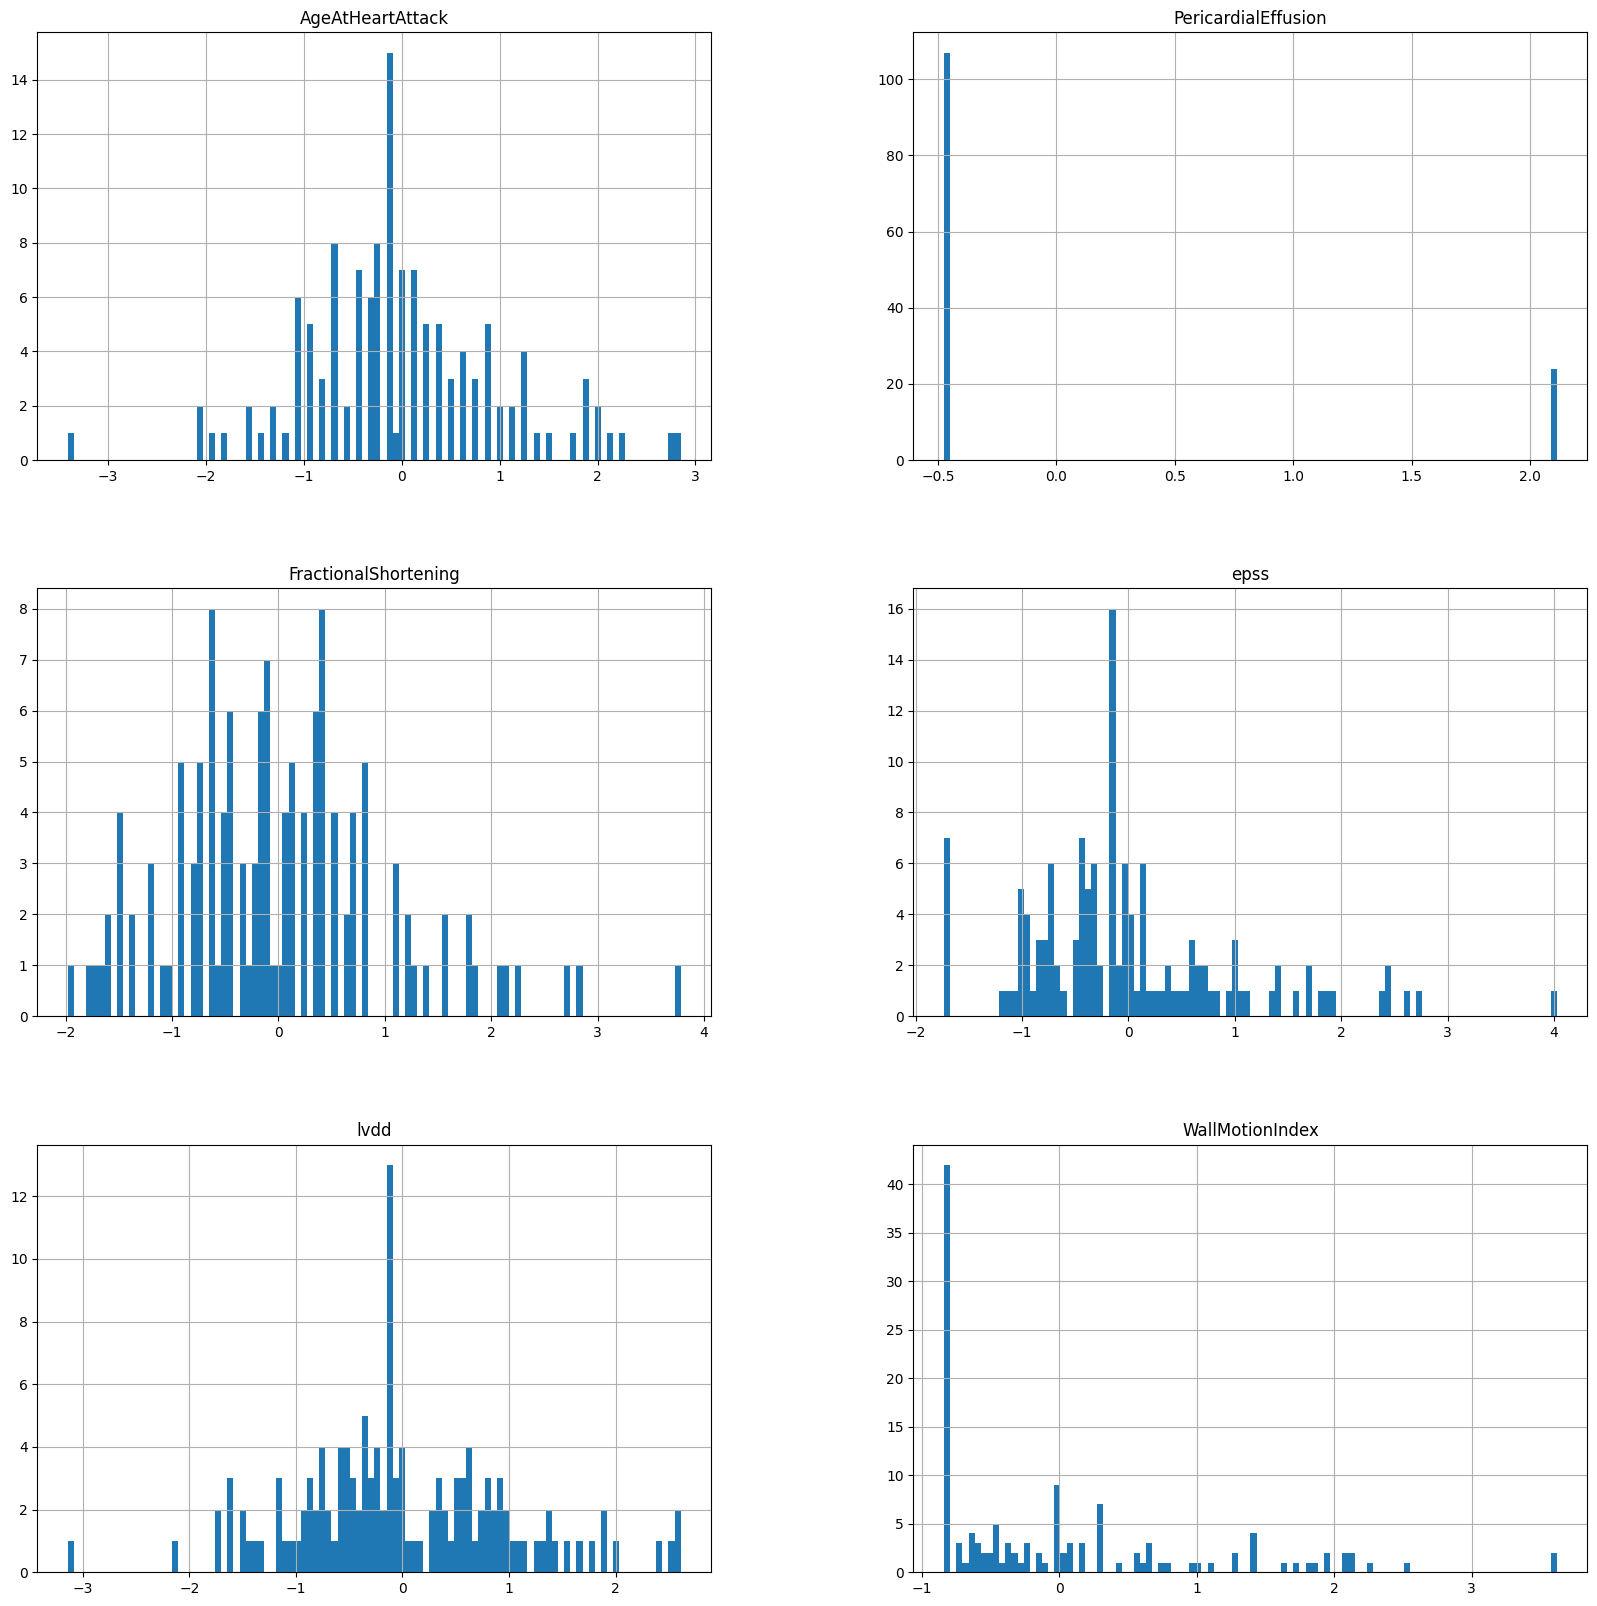

In [ ]:
X_train_processed_df.hist(bins=100, figsize=(20, 20))
plt.show()

# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [ ]:
print(targets.shape)

print(X_train_processed_df.shape)

(131, 1)
(131, 6)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_processed_df, targets, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression classifiers with L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lr_l1.fit(X_train, y_train)

# Train logistic regression classifiers with L2 regularization
lr_l2 = LogisticRegression(penalty='l2', max_iter=10000)
lr_l2.fit(X_train, y_train)

# Train logistic regression classifiers without L1 and L2 regularization
lr_no_reg = LogisticRegression(penalty='none', max_iter=10000)
lr_no_reg.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions using the logistic regression classifiers
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)
y_pred_none = lr_no_reg.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score for each classifier
acc_l1 = accuracy_score(y_test, y_pred_l1)
acc_l2 = accuracy_score(y_test, y_pred_l2)
acc_none = accuracy_score(y_test, y_pred_none)

prec_l1 = precision_score(y_test, y_pred_l1)
prec_l2 = precision_score(y_test, y_pred_l2)
prec_none = precision_score(y_test, y_pred_none)

rec_l1 = recall_score(y_test, y_pred_l1)
rec_l2 = recall_score(y_test, y_pred_l2)
rec_none = recall_score(y_test, y_pred_none)

f1_l1 = f1_score(y_test, y_pred_l1)
f1_l2 = f1_score(y_test, y_pred_l2)
f1_none = f1_score(y_test, y_pred_none)

# Print the performance metrics for each classifier
print("Classifier with L1 regularization:")
print("Accuracy: {:.3f}".format(acc_l1))
print("Precision: {:.3f}".format(prec_l1))
print("Recall: {:.3f}".format(rec_l1))
print("F1 Score: {:.3f}".format(f1_l1))
print()

print("Classifier with L2 regularization:")
print("Accuracy: {:.3f}".format(acc_l2))
print("Precision: {:.3f}".format(prec_l2))
print("Recall: {:.3f}".format(rec_l2))
print("F1 Score: {:.3f}".format(f1_l2))
print()

print("Classifier without regularization:")
print("Accuracy: {:.3f}".format(acc_none))
print("Precision: {:.3f}".format(prec_none))
print("Recall: {:.3f}".format(rec_none))
print("F1 Score: {:.3f}".format(f1_none))


Classifier with L1 regularization:
Accuracy: 0.704
Precision: 0.429
Recall: 0.429
F1 Score: 0.429

Classifier with L2 regularization:
Accuracy: 0.704
Precision: 0.429
Recall: 0.429
F1 Score: 0.429

Classifier without regularization:
Accuracy: 0.704
Precision: 0.429
Recall: 0.429
F1 Score: 0.429


# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_clf = RandomForestClassifier()

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score for each classifier
acc_rf = accuracy_score(y_test, y_pred_rf )

prec_rf = precision_score(y_test, y_pred_rf )

rec_rf = recall_score(y_test, y_pred_rf )

f1_rf = f1_score(y_test, y_pred_rf )

print("Random Forest classifier:")
print("Accuracy: {:.3f}".format(acc_rf))
print("Precision: {:.3f}".format(prec_rf))
print("Recall: {:.3f}".format(rec_rf))
print("F1 Score: {:.3f}".format(f1_rf))

<ipython-input-48-6913baa14b1d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Random Forest classifier:
Accuracy: 0.667
Precision: 0.333
Recall: 0.286
F1 Score: 0.308


In [ ]:
# Extract feature importances and sort them in descending order
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_clf.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the top five most important features
print('Top 5 features according to Random Forest:')
print(feature_importances.head(5))

Top 5 features according to Random Forest:
                feature  importance
5       WallMotionIndex    0.232226
4                  lvdd    0.210189
3                  epss    0.191666
2  FractionalShortening    0.178262
0      AgeAtHeartAttack    0.151969
